##  importing Labraries

In [44]:
#0.1 importing Labraries
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# importing Normal_customer_final pkl
Normal_activity_customer = pd.read_pickle(os.path.join('C:\\Users\\bukola\\Desktop\\Lanre Comp\\Documents\\CF\Instacart Basket Analysis\\02 Data','Normal_customer_final.pkl'))

In [3]:
Normal_activity_customer.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'Busiest day',
       'Busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_prices', 'Spender_flag', 'median_days_since_prior_order',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'num_of_dependants', 'family_status', 'income', 'region',
       'exclusion_flag', 'age_group', 'income_distribution', 'dependant_flag',
       'family_profile', 'department'],
      dtype='object')

In [4]:
np.random.seed(4)

In [5]:
dev = np.random.rand(len(Normal_activity_customer)) <= 0.7

In [6]:
# store 70% of the data frame big
big = Normal_activity_customer[dev]

In [7]:
# store 30% of the data frame samll
small = Normal_activity_customer[~dev]

In [8]:
Normal_activity_customer.shape

(24415721, 38)

##  Creating crosstab between region and spending habit

In [9]:
# Create crosstab between region and spending habit

crosstab_habit_region = pd.crosstab(Normal_activity_customer['region'], Normal_activity_customer['Spender_flag'], dropna = False)

In [10]:
crosstab_habit_region

Spender_flag,Higher spender,Low spender
region,,
Midwest,119210,5592734
Northeast,82617,4232792
South,159230,7970160
West,121686,6137292


Low spenders make up a majority of the customers. Southern region makes up the most low spenders, then West, Midwest

Text(0.5, 1.0, 'Spending Habits by Region:')

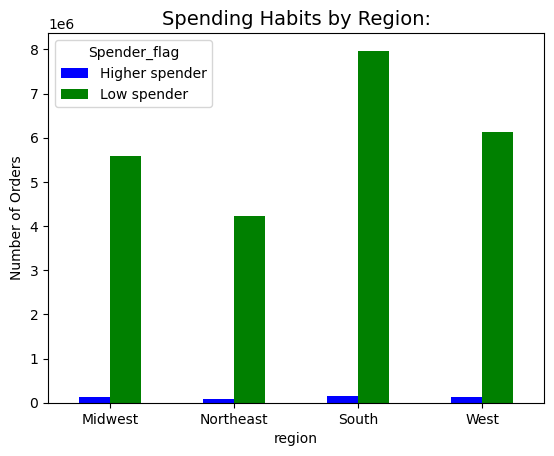

In [11]:
crossbar_habit_region = crosstab_habit_region.plot.bar(color=['blue','green'])
plt.xlabel('region')
plt.xticks(rotation=0)
plt.ylabel("Number of Orders")
plt.title("Spending Habits by Region:",fontsize=14)

In [131]:
crossbar_habit_region.figure.savefig(os.path.join('C:\\Users\\bukola\\Desktop\\Lanre Comp\\Documents\\CF\\Instacart Basket Analysis\\06 Visualisation','region_spending.png'))

## Create crosstab between age_group and income_distribution

In [13]:
# Create crosstab between age_group and income_distribution

crosstab_age_group = pd.crosstab(Normal_activity_customer['age_group'], Normal_activity_customer['income_distribution'], dropna = False)

In [14]:
crosstab_age_group

income_distribution,Middle income,high income,low income
age_group,,,
Middle adult,4829712,3671870,1402476
old adult,2985328,2330000,777069
young adult,4393001,101856,3924409


Text(0.5, 1.0, 'Spending Habits by age group:')

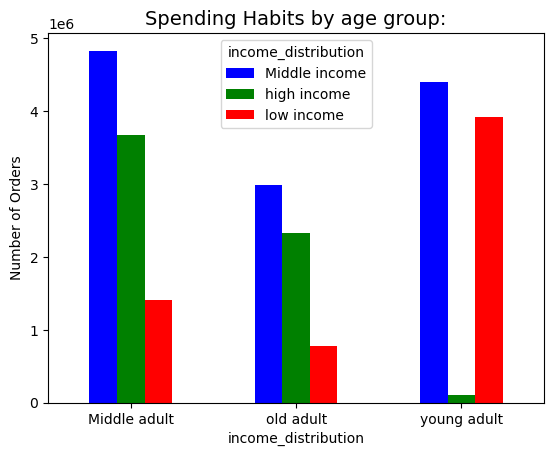

In [15]:
crosstab_age_group = crosstab_age_group.plot.bar(color=['blue','green','red'])
plt.xlabel('income_distribution')
plt.xticks(rotation=0)
plt.ylabel("Number of Orders")
plt.title("Spending Habits by age group:",fontsize=14)

In [16]:
crosstab_age_group.figure.savefig(os.path.join('C:\\Users\\bukola\\Desktop\\Lanre Comp\\Documents\\CF\\Instacart Basket Analysis\\06 Visualisation','habit_region.png'))

# Creating  crosstab between family profile and order within the region 

In [19]:
#Create crosstab between familyand 

crosstab_family_region = pd.crosstab(Normal_activity_customer['family_profile'], Normal_activity_customer['region'], dropna = False)

In [20]:
crosstab_family_region

region,Midwest,Northeast,South,West
family_profile,,,,
married female with children,2016692,1460817,2809462,2221290
married male with children,1982244,1584472,2882276,2181781
single female has children,134045,94949,201553,141143
single female no children,715405,521882,1041231,769549
single male has children,141945,109985,197682,150128
single male no children,721613,543304,997186,795087


<Figure size 500x700 with 0 Axes>

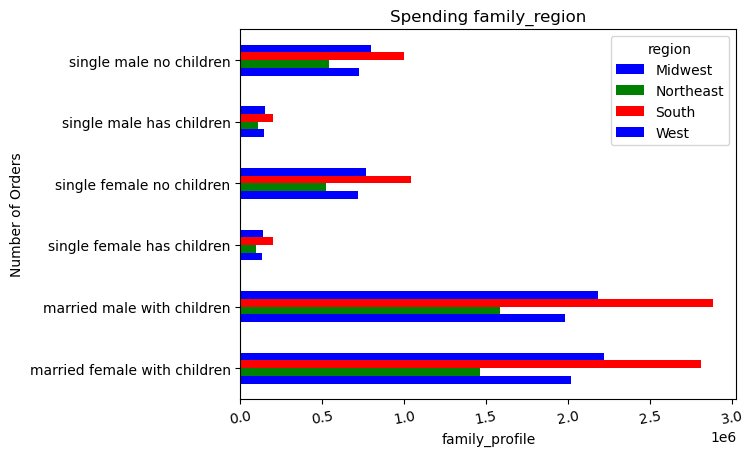

<Figure size 500x700 with 0 Axes>

In [21]:
#Orders by family_region
crosstab_family_region = crosstab_family_region.plot.barh(color=['blue','green','red'])
plt.ylabel('Number of Orders')
plt.xticks(rotation=10)
plt.xlabel('family_profile')
plt.title('Spending family_region')
plt.figure(figsize=(5, 7))

In [22]:
crosstab_family_region.figure.savefig(os.path.join('C:\\Users\\bukola\\Desktop\\Lanre Comp\\Documents\\CF\\Instacart Basket Analysis\\06 Visualisation','crosstab_family_region.png'))

# Create crosstab between department and family profile

In [23]:
#Create crosstab between department and family profile

crosstab_family_dpartment2 = pd.crosstab(Normal_activity_customer['department'], Normal_activity_customer['family_profile'], dropna = False)

In [24]:
crosstab_family_dpartment2

family_profile,married female with children,married male with children,single female has children,single female no children,single male has children,single male no children
department,,,,,,
alcohol,39475,34265,2657,14149,3627,13829
babies,115331,120708,7316,41215,8279,43098
bakery,310522,308666,20848,109792,21695,111807
beverages,711112,718956,45997,256138,48327,255917
breakfast,184827,184255,12986,65058,13269,65319
bulk,9789,9837,636,3372,711,3213
canned goods,273411,281146,17778,97119,20006,98330
dairy eggs,1435126,1455230,98402,517077,101492,513161
deli,272204,275270,18539,98781,19004,99213


<Figure size 1000x1200 with 0 Axes>

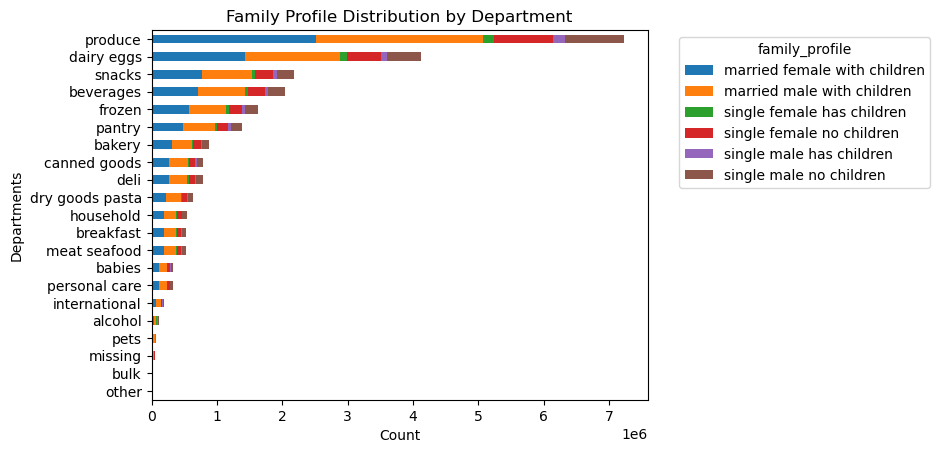

In [26]:
# creating stack bar for family profile abd department
crosstab_family_dpartment = crosstab_family_dpartment2.sort_values(by='married female with children', ascending=True)
plt.figure(figsize=(10, 12))
crosstab_family_dpartment.plot.barh(stacked=True)
plt.title('Family Profile Distribution by Department')
plt.xlabel('Count')
plt.ylabel('Departments')
plt.legend(title='family_profile', bbox_to_anchor=(1.05, 1), loc='upper left')

<Figure size 1000x1200 with 0 Axes>

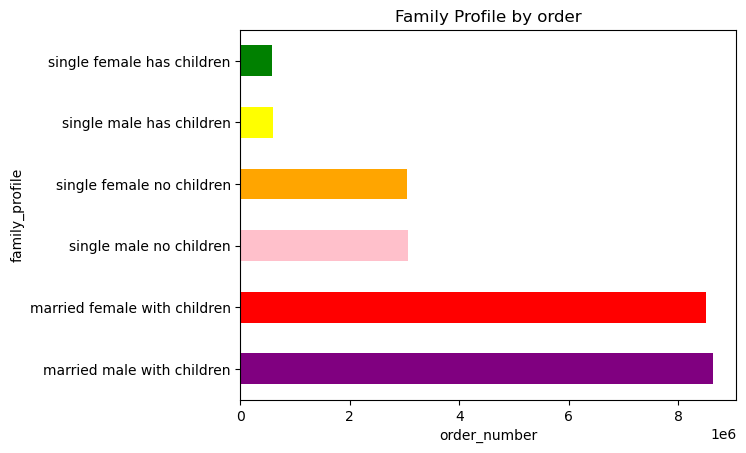

<Figure size 1000x1200 with 0 Axes>

In [31]:
# creating stack bar for family profile order   
bar = Normal_activity_customer['family_profile'].value_counts().plot.barh(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])
plt.title('Family Profile by order')
plt.xlabel('order_number')
plt.ylabel('family_profile')
plt.heigt=0.2
plt.figure(figsize=(10, 12))

In [32]:
bar.figure.savefig(os.path.join('C:\\Users\\bukola\\Desktop\\Lanre Comp\\Documents\\CF\\Instacart Basket Analysis\\06 Visualisation','crosstab_family_profile.png'))

## creating bar for orders_day_of_week order 

<Figure size 1000x1200 with 0 Axes>

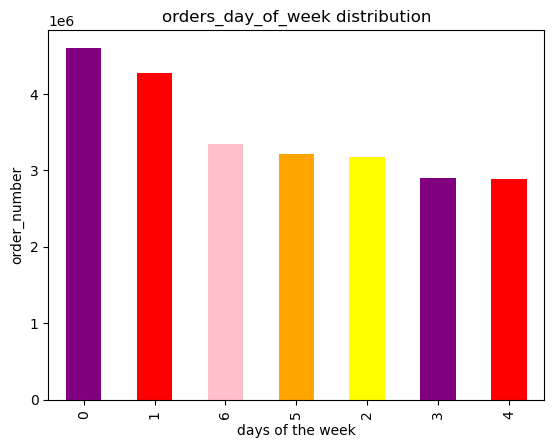

<Figure size 1000x1200 with 0 Axes>

In [67]:
# creating bar for orders_day_of_week   
bar = Normal_activity_customer['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow'])
mapping = (0,'Saturday', 1,'Sunday', 2,'Monday', 3,'Tuesday', 4,'Wednesday', 5, 'Thursday', 6,'Friday')
plt.title('orders_day_of_week distribution')
plt.xlabel('days of the week')
plt.ylabel('order_number')
plt.heigt=0.2
plt.figure(figsize=(10, 12))

In [36]:
bar.figure.savefig(os.path.join('C:\\Users\\bukola\\Desktop\\Lanre Comp\\Documents\\CF\\Instacart Basket Analysis\\06 Visualisation','orders_day_of_week.png'))

## Price range classification 

In [37]:
Normal_activity_customer['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid-range product     16480252
Low-range product      7626782
High-range product      308687
Name: count, dtype: int64

## Creating  crosstab between department and age group

In [38]:
#Create crosstab between department and age group

crosstab_age_group_dept = pd.crosstab(Normal_activity_customer['department'], Normal_activity_customer['age_group'], dropna = False)

In [39]:
crosstab_age_group_dept

age_group,Middle adult,old adult,young adult
department,,,
alcohol,43652,25595,38755
babies,138938,81393,115616
bakery,359778,219027,304525
beverages,831606,512421,692420
breakfast,214376,129181,182157
bulk,11165,6840,9553
canned goods,319459,195902,272429
dairy eggs,1664323,1026295,1429870
deli,317623,195252,270136


## creating stack bar for department and age group


In [47]:
#Create crosstab between department and age group

crosstab_dept = pd.crosstab(Normal_activity_customer['department'], Normal_activity_customer['order_number'], dropna = False)

<Figure size 1000x1200 with 0 Axes>

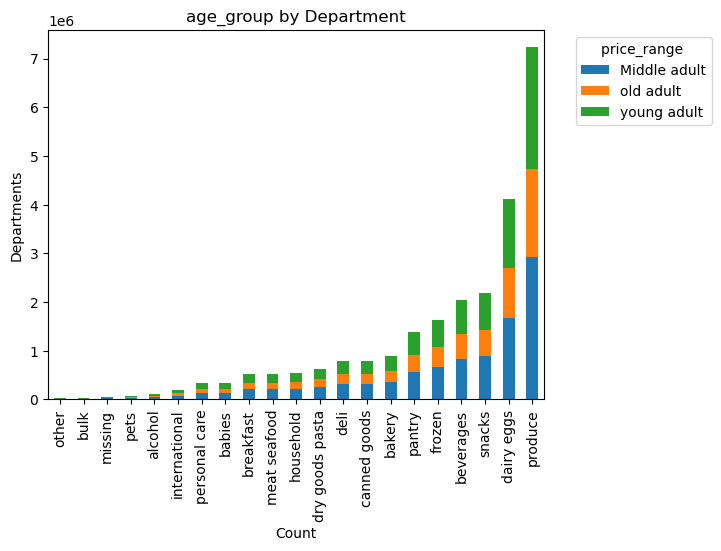

In [41]:
# creating stack bar for family profile abd department
crosstab_age_group_dept = crosstab_age_group_dept.sort_values(by='old adult', ascending=True)
plt.figure(figsize=(10, 12))
crosstab_age_group_dept.plot.bar(stacked=True)
plt.title('age_group by Department')
plt.xlabel('Count')
plt.ylabel('Departments')
plt.legend(title='price_range ', bbox_to_anchor=(1.05, 1), loc='upper left')

## loyalty_flag bar 

<Figure size 1200x1500 with 0 Axes>

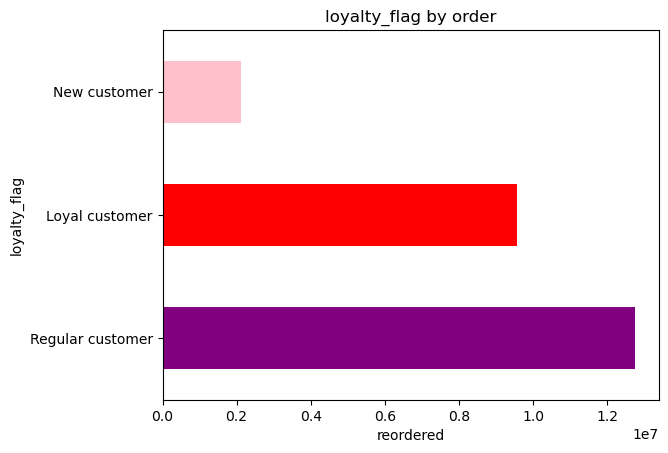

<Figure size 1200x1500 with 0 Axes>

In [68]:
#loyalty_flag bar 
loyalty_cust = Normal_activity_customer['loyalty_flag'].value_counts().plot.barh(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])
plt.title('loyalty_flag by order')
plt.xlabel('reordered')
plt.ylabel('loyalty_flag')
plt.heigt=0.2
plt.figure(figsize=(12, 15))

In [69]:
loyalty_cust.figure.savefig(os.path.join('C:\\Users\\bukola\\Desktop\\Lanre Comp\\Documents\\CF\\Instacart Basket Analysis\\06 Visualisation','loyalty_cust.png'))

## Creating crosstab between department and customer Loyalty

In [70]:
#Create crosstab between department and customer Looyalty
crosstab_loyalty_customer_dept = pd.crosstab(Normal_activity_customer['department'], Normal_activity_customer['loyalty_flag'], dropna = False)

In [71]:
crosstab_loyalty_customer_dept

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,36172,11308,60522
babies,155215,21000,159732
bakery,353053,75118,455159
beverages,797574,175848,1063025
breakfast,205513,46415,273786
bulk,12920,1914,12724
canned goods,274192,79226,434372
dairy eggs,1702365,329766,2088357
deli,299963,68729,414319


<Figure size 1000x1200 with 0 Axes>

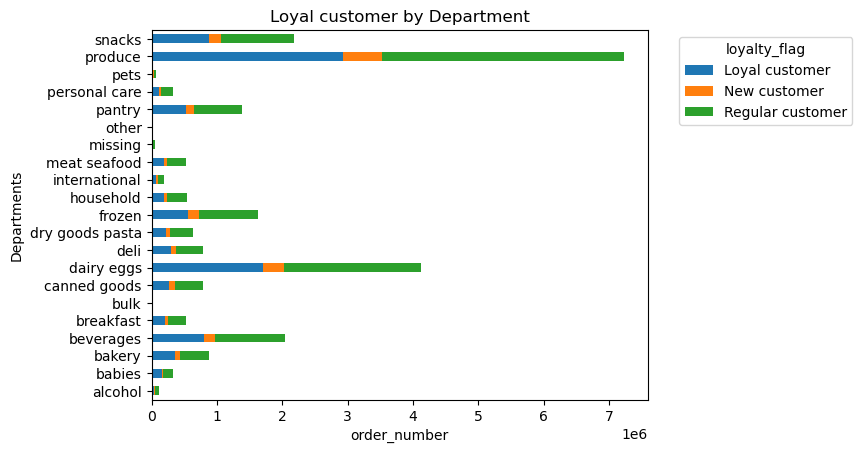

In [72]:
# creating stack bar for loyalty customer and department
crosstab_age_group_dept = crosstab_loyalty_customer_dept.sort_values(by='New customer', ascending=True)
plt.figure(figsize=(10, 12))
crosstab_loyalty_customer_dept.plot.barh(stacked=True)
plt.title('Loyal customer by Department')
plt.xlabel('order_number')
plt.ylabel('Departments')
plt.legend(title='loyalty_flag', bbox_to_anchor=(1.05, 1), loc='upper left')

## Creating crosstab between department and region

In [73]:
#Create crosstab between department and region
crosstab_region = pd.crosstab(Normal_activity_customer['department'], Normal_activity_customer['region'], dropna = False)

In [74]:
crosstab_region

region,Midwest,Northeast,South,West
department,,,,
alcohol,25574,18544,36261,27623
babies,78496,59555,113970,83926
bakery,205374,157635,292772,227549
beverages,472243,367868,680594,515742
breakfast,121932,92779,174699,136304
bulk,6488,4598,9184,7288
canned goods,184194,137950,263145,202501
dairy eggs,962300,729754,1371620,1056814
deli,182735,139553,259644,201079


<Figure size 1000x1200 with 0 Axes>

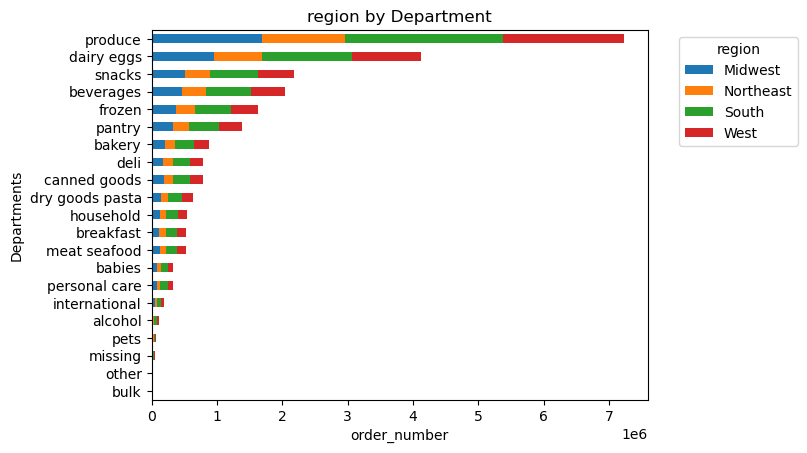

In [75]:
# creating stack bar for department and region
crosstab_region = crosstab_region.sort_values(by= 'Northeast', ascending=True)
plt.figure(figsize=(10, 12))
crosstab_region.plot.barh(stacked=True)
plt.title('region by Department')
plt.xlabel('order_number')
plt.ylabel('Departments')
plt.legend(title='region', bbox_to_anchor=(1.05, 1), loc='upper left')

 ## creating  bar for department order   

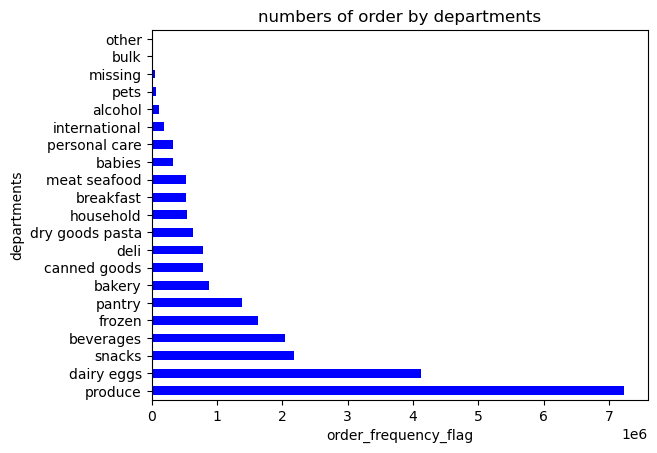

<Figure size 600x400 with 0 Axes>

In [129]:
 #creating  bar for department order   
bar = Normal_activity_customer['department'].value_counts().plot.barh(color =['blue'])
plt.title('numbers of order by departments')
plt.xlabel('order_frequency_flag',)
plt.ylabel('departments')
plt.heigt=0.1
plt.figure(figsize=(6, 4))
plt.front=2


In [130]:
bar.figure.savefig(os.path.join('C:\\Users\\bukola\\Desktop\\Lanre Comp\\Documents\\CF\\Instacart Basket Analysis\\06 Visualisation','department.png'))

## # Create crosstab between customer loyalty and region

In [132]:
# Create crosstab between customer loyalty and region

crosstab_loyalty_group = pd.crosstab(Normal_activity_customer['region'], Normal_activity_customer['loyalty_flag'], dropna = False)

In [133]:
crosstab_loyalty_group

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2204689,499602,3007653
Northeast,1710927,370280,2234202
South,3163225,702503,4263662
West,2476928,542518,3239532


Text(0.5, 1.0, 'loyalty Habits by Region:')

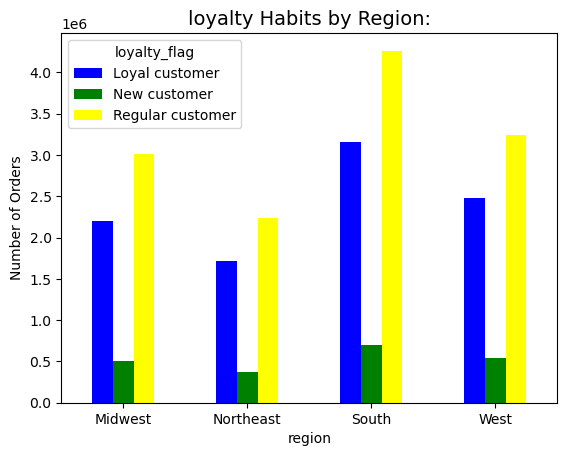

In [134]:
crosstab_loyalty_group = crosstab_loyalty_group.plot.bar(color=['blue','green','yellow'])
plt.xlabel('region')
plt.xticks(rotation=0)
plt.ylabel("Number of Orders")
plt.title("loyalty Habits by Region:",fontsize=14)

In [135]:
crosstab_loyalty_group.figure.savefig(os.path.join('C:\\Users\\bukola\\Desktop\\Lanre Comp\\Documents\\CF\\Instacart Basket Analysis\\06 Visualisation','region_loyalty.png'))

In [195]:
# Create crosstab between age_group and income_distribution

crosstab_loyalty_group = pd.crosstab(Normal_activity_customer['region'], Normal_activity_customer['loyalty_flag'], dropna = False)

Text(0.5, 1.0, 'loyalty Habits by Region:')

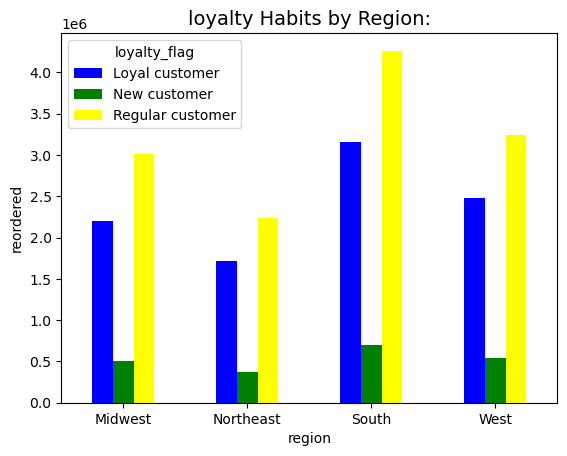

In [196]:
crosstab_loyalty_group = crosstab_loyalty_group.plot.bar(color=['blue','green','yellow'])
plt.xlabel('region')
plt.xticks(rotation=0)
plt.ylabel("reordered")
plt.title("loyalty Habits by Region:",fontsize=14)

In [201]:
crosstab_loyalty_group.figure.savefig(os.path.join('C:\\Users\\bukola\\Desktop\\Lanre Comp\\Documents\\CF\\Instacart Basket Analysis\\06 Visualisation','region_reorder.png'))

##  Create crosstab between department and region 

In [206]:
# Create crosstab between department and region 

crosstab_department_region = pd.crosstab(Normal_activity_customer['department'], Normal_activity_customer['region'], dropna = False)

In [207]:
crosstab_department_region

region,Midwest,Northeast,South,West
department,,,,
alcohol,25574,18544,36261,27623
babies,78496,59555,113970,83926
bakery,205374,157635,292772,227549
beverages,472243,367868,680594,515742
breakfast,121932,92779,174699,136304
bulk,6488,4598,9184,7288
canned goods,184194,137950,263145,202501
dairy eggs,962300,729754,1371620,1056814
deli,182735,139553,259644,201079


<Figure size 1000x800 with 0 Axes>

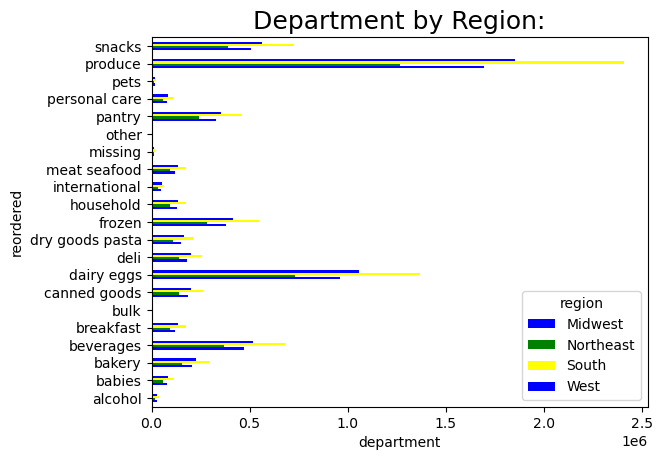

<Figure size 1000x800 with 0 Axes>

In [208]:
crosstab_department_region = crosstab_department_region.plot.barh(color=['blue','green','yellow'])
plt.xlabel('department')
plt.xticks(rotation=0)
plt.ylabel("reordered")
plt.title("Department by Region:",fontsize=18)
plt.heigt=10
plt.figure(figsize=(10,8))